# EDA

In [99]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import linalg as LA
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
#from skmultilearn.adapt import MLkNN
#import multilabel_knn as mlk
import re
import string
import nltk
from tqdm import tqdm #to show progress bar

In [7]:
#!pip install scikit-multilearn

In [8]:
#!pip install multilabel_knn

In [9]:
#!pip install --install-option="--prefix=$./anaconda3/lib/python3.8/site-packages" multilabel_knn

In [10]:
!ls

Applications                  Public
Desktop                       RDX_EDA.ipynb
Documents                     anaconda3
Downloads                     get-pip.py
HW9.Rmd                       graph_evaluation
HW9.html                      miniconda3
HW9.log                       myFirstAnacondaNotebook.ipynb
HW9.tex                       nltk_data
Library                       node_modules
Movies                        opt
Music                         package-lock.json
NewFolder                     package.json
NewFolder.1                   teleparty-assessment
Pictures                      wekafiles


In [11]:
df = pd.DataFrame(pd.read_excel("Desktop/CMU/Ind_Study/Responses.xlsx"))

In [12]:
df.head(5)

,Profile Bio / Statement of Entrepreneur Background (Experience),"What problems/issues are you currently facing in your entrepreneurship space (i.e., things that founders face such as challenges with investors, cofounders, business stressors, business model, strategic partners, company culture, anxiety, sales, financing, etc.)?",Bio Labels,Problem Labels
0,"While in college, I had the opportunity to wor...",One of the biggest early challenges that we fa...,"College entrepreneurship, Minimum viable produ...","Startup transition, Young team, Small startup,..."
1,My name is *****. I am a software engineer and...,I am currently experiencing the challenge of t...,"Software, Technology","Young team, Lacks experience, Minimum viable p..."
2,"I have worked for several tech startups, most ...",I would say loneliness and mental health are k...,"Software, Technology, Video game, Commercializ...","Lonely, Mental health, Lacks support"
3,"8 years of sales, entrepreneur at heart.\nGrad...",I’m a visionary so I love all of the product d...,"Sales, Marketing","Startup finance, Finding investors, Business law"
4,Founded natural skincare company\nAcquired sma...,Staffing issues\nTech Disparity in multi gener...,"Skincare, Coffee, Business, Consulting","Staffing issues, Workforce lacks knowledge, La..."


In [13]:
bio_labels = df['Bio Labels'].to_numpy()
#bio_labels
new = np.array([], dtype=str)
for i in range(len(bio_labels)):
    new = np.append(new, bio_labels[i].split(', '))
bio_labels = new
bio_labels.shape

bio_unique, bio_counts = np.unique(bio_labels, return_counts=True)

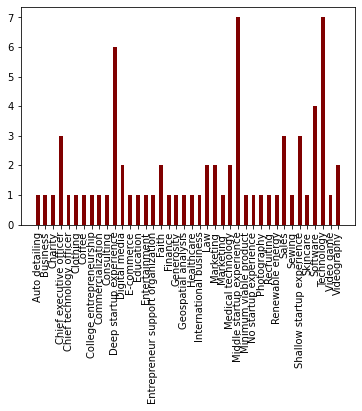

In [14]:
plt.bar(bio_unique, bio_counts, color ='maroon',
        width = 0.5)
 
plt.xticks(rotation=90)
plt.show()

In [15]:
prob_labels = df['Problem Labels'].to_numpy()
#bio_labels
new = np.array([], dtype=str)
for i in range(len(prob_labels)):
    new = np.append(new, prob_labels[i].split(', '))
prob_labels = new
prob_labels.shape

prob_unique, prob_counts = np.unique(prob_labels, return_counts=True)

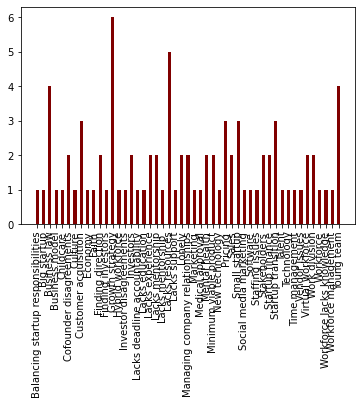

In [16]:
plt.bar(prob_unique, prob_counts, color ='maroon',
        width = 0.5)
 
plt.xticks(rotation=90)
plt.show()

In [17]:
#Plotting the distribution of label count for bios

bio_labels = df['Bio Labels'].to_numpy()

new = np.array([], dtype=str)
for i in range(len(bio_labels)):
    new = np.append(new, len(bio_labels[i].split(', ')))
bio_labels = new
bio_labels.shape

bio_count_unique, bio_count_counts = np.unique(bio_labels, return_counts=True)

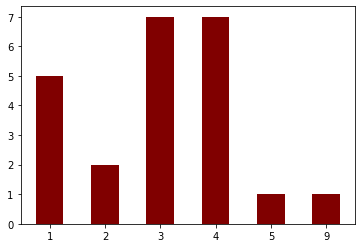

In [18]:
plt.bar(bio_count_unique, bio_count_counts, color ='maroon',
        width = 0.5)
plt.show()

In [19]:
#Plotting the distribution of label count for probs

prob_labels = df['Problem Labels'].to_numpy()

new = np.array([], dtype=str)
for i in range(len(prob_labels)):
    new = np.append(new, len(prob_labels[i].split(', ')))
prob_labels = new
prob_labels.shape

prob_count_unique, prob_count_counts = np.unique(prob_labels, return_counts=True)

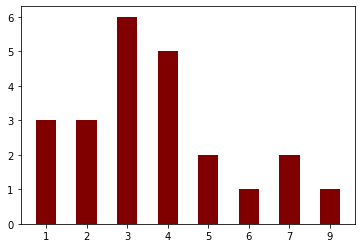

In [20]:
plt.bar(prob_count_unique, prob_count_counts, color ='maroon',
        width = 0.5)

plt.show()

In [21]:
bio_unique

array(['Auto detailing', 'Business', 'Charity', 'Chief executive officer',
       'Chief technology officer', 'Clothing', 'Coffee',
       'College entrepreneurship', 'Commercialization', 'Consulting',
       'Deep startup experience', 'Digital media', 'E-commerce',
       'Education', 'Entertainment', 'Entrepreneur support organization',
       'Faith', 'Finance', 'Generosity', 'Geospatial analysis',
       'Healthcare', 'International business', 'Law', 'Marketing',
       'Marketing ', 'Medical technology', 'Middle startup experience',
       'Minimum viable product', 'No startup experience', 'Photography',
       'Recruiting', 'Renewable energy', 'Sales', 'Sewing',
       'Shallow startup experience', 'Skincare', 'Software', 'Technology',
       'Video game', 'Videography'], dtype='<U33')

In [22]:
#One-hot encoding the bio labels
df['Bio Encoded Labels'] = df['Bio Labels'].apply(lambda x: np.sum(label_binarize(x.split(', '), classes=bio_unique), axis=0))



In [23]:
#One-hot encoding the probs labels
df['Problem Encoded Labels'] = df['Problem Labels'].apply(lambda x: np.sum(label_binarize(x.split(', '), classes=prob_unique), axis=0))

In [24]:
df.head(10)

,Profile Bio / Statement of Entrepreneur Background (Experience),"What problems/issues are you currently facing in your entrepreneurship space (i.e., things that founders face such as challenges with investors, cofounders, business stressors, business model, strategic partners, company culture, anxiety, sales, financing, etc.)?",Bio Labels,Problem Labels,Bio Encoded Labels,Problem Encoded Labels
0,"While in college, I had the opportunity to wor...",One of the biggest early challenges that we fa...,"College entrepreneurship, Minimum viable produ...","Startup transition, Young team, Small startup,...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,My name is *****. I am a software engineer and...,I am currently experiencing the challenge of t...,"Software, Technology","Young team, Lacks experience, Minimum viable p...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"I have worked for several tech startups, most ...",I would say loneliness and mental health are k...,"Software, Technology, Video game, Commercializ...","Lonely, Mental health, Lacks support","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"8 years of sales, entrepreneur at heart.\nGrad...",I’m a visionary so I love all of the product d...,"Sales, Marketing","Startup finance, Finding investors, Business law","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
4,Founded natural skincare company\nAcquired sma...,Staffing issues\nTech Disparity in multi gener...,"Skincare, Coffee, Business, Consulting","Staffing issues, Workforce lacks knowledge, La...","[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,I am a Founder building a platform that allows...,"Well, I am currently looking at the University...",Entrepreneur support organization,"Young team, Lacks education, Lacks resources, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,32 years of Entrepreneurial experience. I've ...,"Doing business in a ""post pandemic"" world is s...","Deep startup experience, Law, Finance, Marketi...","Big startup, Investors, Virtual workforce, Eco...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
7,Founder and CEO Mirku Software,Culture and Talent in that order,"Middle startup experience, Software, Technolog...","Culture, Talent","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,Cofounded videography business with my wife,It’s not the type of business to go out and se...,"Shallow startup experience, Videography, Digit...","Growth strategy, Lacks resources, Lacks experi...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
9,Here is the Press Release announcing my new po...,We have been on the struggle bus when it comes...,"Deep startup experience, Chief executive offic...","Startup finance, Lacks resources, New technolo...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [25]:
df['Bio Encoded Labels'][0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
df['Bio Labels'][0]

'College entrepreneurship, Minimum viable product, Geospatial analysis'

In [27]:
df['Problem Encoded Labels'][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1])

In [28]:
df['Problem Labels'][0]

'Startup transition, Young team, Small startup, Work division'

In [29]:
df = df.rename(columns={"Profile Bio / Statement of Entrepreneur Background (Experience)": "Bio", "What problems/issues are you currently facing in your entrepreneurship space (i.e., things that founders face such as challenges with investors, cofounders, business stressors, business model, strategic partners, company culture, anxiety, sales, financing, etc.)?": "Problem"})

# Text Preprocessing

In [30]:
#below option is not necessary everytime. only if stopword resource is not found then run below command
#nltk.download('stopwords')

In [31]:
#Initial Preprocessing steps

#Removing any special characters that may cause issues in our model
def cleanpunc(sentence): #to remove special characters
    pattern = r'[' + string.punctuation + ']'
    cleaned = re.sub(pattern, '', sentence)
    return cleaned
                   
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
#initializing the snowball stemmer that will convert the words to their root meaning
sno=nltk.stem.SnowballStemmer('english')

In [32]:
#Applying more preprocessing steps

def textPrep(data):
    i=0
    str1=' '
    final_string=[]
    s=''
    for sent in tqdm(data.values):
        filtered_sent=[]
        for w in sent.split():
            for cleaned_words in cleanpunc(w).split():
                if((cleaned_words.isalpha())&(len(cleaned_words)>2)): #keeping only english words
                    if(cleaned_words.lower() not in stop):
                        s=(sno.stem(cleaned_words.lower())).encode("utf-8") #stemming
                        filtered_sent.append(s)
                    else:
                        continue
                else:
                    continue
        str1=b" ".join(filtered_sent)
        final_string.append(str1)
        i+=1
    return final_string

df['Cleaned Bio'] = textPrep(df['Bio'])
df['Cleaned Bio'] = df['Cleaned Bio'].str.decode("utf-8")

df['Cleaned Problem'] = textPrep(df['Problem'])
df['Cleaned Problem'] = df['Cleaned Problem'].str.decode("utf-8")

100%|██████████| 23/23 [00:00<00:00, 817.89it/s]


# Data Splitting

In [33]:
#Train Test Val split
df = df.sample(frac=1).reset_index(drop=True)

df_train, df_test = train_test_split(df, test_size=0.4)

#df_test, df_val = train_test_split(df_test, test_size=0.5)

In [34]:
df_train = df_train.reset_index(drop=True)
df_train

,Bio,Problem,Bio Labels,Problem Labels,Bio Encoded Labels,Problem Encoded Labels,Cleaned Bio,Cleaned Problem
0,Third time founder with past experience as the...,I struggle to get time to work on the actual b...,"Chief technology officer, Technology, Deep sta...","Time management, Balancing startup responsibil...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",third time founder past experi cto sever startup,struggl get time work actual busi tri bootstra...
1,Founder,Non aligned investors,Middle startup experience,Investor disagreements,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",founder,non align investor
2,Owner/ President Orchard Eight Media. A video ...,I think the biggest struggle for me right now ...,"Middle startup experience, Digital media, Vide...","Growth strategy, Small startup, Startup transi...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",owner presid orchard eight media video photo c...,think biggest struggl right scale success sale...
3,"I have worked for several tech startups, most ...",I would say loneliness and mental health are k...,"Software, Technology, Video game, Commercializ...","Lonely, Mental health, Lacks support","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",work sever tech startup often one first employ...,would say loneli mental health key area face i...
4,I founded an marketplace e-commerce company in...,We greatly struggled with finding cost-effecti...,"E-commerce, Middle startup experience, Education","Technology, Minimum viable product, Software, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",found marketplac ecommerc compani help homesch...,great struggl find costeffect reliabl tech pro...
5,Started my own sewing business 4 years ago mak...,"expensive pricing of materials and fabric, lab...","Sewing, Clothing, Shallow startup experience","Lacks resources, Pricing, Growth strategy, Cus...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ...",start sew busi year ago make mask scrunchi hea...,expens price materi fabric labor custom want p...
6,32 years of Entrepreneurial experience. I've ...,"Doing business in a ""post pandemic"" world is s...","Deep startup experience, Law, Finance, Marketi...","Big startup, Investors, Virtual workforce, Eco...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",year entrepreneuri experi ive start compani in...,busi post pandem world strang pandem chang eve...
7,I have founded and run a few different compani...,I have faced a few different problems recently...,Middle startup experience,"Cofounder disagreements, Work division, Busine...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...",found run differ compani past howev studi entr...,face differ problem recent main problem cofoun...
8,"While in college, I had the opportunity to wor...",One of the biggest early challenges that we fa...,"College entrepreneurship, Minimum viable produ...","Startup transition, Young team, Small startup,...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",colleg opportun work entrepreneuri endeavor en...,one biggest earli challeng face small startup ...
9,Founder and CEO Mirku Software,Culture and Talent in that order,"Middle startup experience, Software, Technolog...","Culture, Talent","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",founder ceo mirku softwar,cultur talent order


In [35]:
#df_val = df_test.reset_index(drop=True)
#df_val

In [36]:
df_test = df_test.reset_index(drop=True)
df_test

,Bio,Problem,Bio Labels,Problem Labels,Bio Encoded Labels,Problem Encoded Labels,Cleaned Bio,Cleaned Problem
0,Minimal,"Cofounders, business model",No startup experience,"Stakeholders, Managing company relationships, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",minim,cofound busi model
1,5.5 years of entrepreneurial experience,Sales,Middle startup experience,Sales,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",year entrepreneuri experi,sale
2,"I am the founder and CEO of Simple Charity, a ...",I'm currently facing the challenge of navigati...,"Chief executive officer, Charity, Generosity, ...","Stakeholders, Managing company relationships","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",founder ceo simpl chariti nonprofit inspir chr...,current face challeng navig complex web stakeh...
3,Here is the Press Release announcing my new po...,We have been on the struggle bus when it comes...,"Deep startup experience, Chief executive offic...","Startup finance, Lacks resources, New technolo...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",press releas announc new posit year health car...,struggl bus come financ realli close potenti i...
4,Cofounded videography business with my wife,It’s not the type of business to go out and se...,"Shallow startup experience, Videography, Digit...","Growth strategy, Lacks resources, Lacks experi...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",cofound videographi busi wife,type busi seek capit fund get project bad equi...
5,My name is *****. I am a software engineer and...,I am currently experiencing the challenge of t...,"Software, Technology","Young team, Lacks experience, Minimum viable p...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",name softwar engin also work creat product hop...,current experienc challeng think big soon know...
6,"8 years of sales, entrepreneur at heart.\nGrad...",I’m a visionary so I love all of the product d...,"Sales, Marketing","Startup finance, Finding investors, Business law","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",year sale entrepreneur heart graduat penn stat...,visionari love product design implement vision...
7,Founded a health tech company that focuses on ...,Phase change - need to move from bootstrap/scr...,"Deep startup experience, Technology, Medical t...","Growth strategy, Startup transition, Workforce...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",found health tech compani focus patient navig ...,phase chang need move bootstrapscrappi systems...
8,"Launched Amplio Recruiting in 2014, a for-prof...",The two major tensions I faced throughout our ...,"Deep startup experience, Recruiting, Faith","Cofounder disagreements, Finding direction, Faith","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...",launch amplio recruit forprofit staf agenc pla...,two major tension face throughout journey cofo...
9,Founded natural skincare company\nAcquired sma...,Staffing issues\nTech Disparity in multi gener...,"Skincare, Coffee, Business, Consulting","Staffing issues, Workforce lacks knowledge, La...","[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",found natur skincar compani acquir small coffe...,staf issu tech dispar multi generat workforc l...


# Text Embeddings

In [37]:
#Only Bag of words for now

count_vect_bio=CountVectorizer(ngram_range=(1,2))
train_bow_bio=count_vect_bio.fit_transform(df_train['Cleaned Bio'].values)
#val_bow_bio=count_vect_bio.fit_transform(df_val['Cleaned Bio'].values)
test_bow_bio=count_vect_bio.transform(df_test['Cleaned Bio'].values)
#getting feature names, this will act as header for BOW data and  will help to recognize important features
feature_names_bow_bio=count_vect_bio.get_feature_names()

count_vect_prob=CountVectorizer(ngram_range=(1,2))
train_bow_prob=count_vect_prob.fit_transform(df_train['Cleaned Problem'].values)
#val_bow_prob=count_vect_prob.fit_transform(df_val['Cleaned Problem'].values)
test_bow_prob=count_vect_prob.transform(df_test['Cleaned Problem'].values)
#getting feature names, this will act as header for BOW data and  will help to recognize important features
feature_names_bow_prob=count_vect_prob.get_feature_names()

# Model

In [38]:
#Didn't Use because it is not conducive to Multi-Label Classification

comment = '''#Applying Simple Cross validation to find best K
#GridSearchCV and K-Fold take more time so using simple crossvalidation
def find_best_k(train,crossvalidation,algo,k_range,njobs):
    k_plot=[]
    auc_cv_plot=[]
    auc_train_plot=[]
    for k in range(1,k_range,2):
        k_plot.append(k)
        #fitting the model
        model=KNeighborsClassifier(n_neighbors=k,algorithm=algo,n_jobs=njobs)
        model.fit(train,ytrain)
        #predicting probabilities for crossvalidation data
        pred_proba_cv=model.predict_proba(crossvalidation)
        #keep probabilities for positive outcome only
        pred_proba_cv_pos=pred_proba_cv[:,1]
        #predicting probabilities for train data
        pred_proba_train=model.predict_proba(train)
        #keep probabilities for positive outcome only
        pred_proba_train_pos=pred_proba_train[:,1]
        #calculating auc for crossvalidation data
        auc_cv=roc_auc_score(ycrossvalidation, pred_proba_cv_pos)
        #calculating auc for train data
        auc_train=roc_auc_score(ytrain, pred_proba_train_pos)
        auc_cv_plot.append(auc_cv)
        auc_train_plot.append(auc_train)
        print("CV AUC for K=",k," is ",auc_cv, "Train AUC for K=",k," is ",auc_train)
    return k_plot, auc_cv_plot, auc_train_plot'''

In [39]:
#Didn't Use because it is not conducive to Multi-Label Classification

comment = '''from sklearn.neighbors import KNeighborsClassifier
#Applying Simple Cross validation as GridSearchCV and K-Fold take more time
algo='brute'
krange=30
njobs=1 #njobs=-1(parallel work) doesn't work with sparse matrix
k_plot_bow,auc_cv_plot_bow,auc_train_plot_bow=find_best_k(train_bow,crossvalidation_bow,algo,krange,njobs)'''

In [40]:
#Didn't Use because it is not conducive to Multi-Label Classification

comment = '''#training the model with best K that we have obtained
k_bow=20
knn_bow=KNeighborsClassifier(n_neighbors=k_bow,algorithm='brute')
knn_bow.fit(train_bow,ytrain)
bow_pred=knn_bow.predict_proba(test_bow)
#deriving discrete class for plotting confusion matrix
bow_pred_cm = np.argmax(bow_pred, axis=1)
#keeping probabilities for positive outcomes
bow_pred=bow_pred[:,1]
#training predictions
bow_pred_train=knn_bow.predict_proba(train_bow)
bow_pred_cm_train = np.argmax(bow_pred_train, axis=1)
#keeping probabilities for positive outcomes
bow_pred_train=bow_pred_train[:,1]
#calculating AUC on test data
auc_bow = roc_auc_score(ytest, bow_pred)
#roc for train data
fpr_train, tpr_train, thresholds =roc_curve(ytrain, bow_pred_train)
#roc for test data
fpr_test, tpr_test, thresholds = roc_curve(ytest, bow_pred)'''

# Building KNN Model

In [41]:
type(train_bow_bio)

scipy.sparse.csr.csr_matrix

In [42]:
#arr = train_bow_bio.toarray()
#df_train.shape

In [43]:
#Didn't Use because it is not conducive to Multi-Label Classification

comment = '''from sklearn.model_selection import GridSearchCV

parameters = {'k': range(1,3), 's': [0.5, 0.7, 1.0]}
score = 'f1_macro'

clf = GridSearchCV(MLkNN(), parameters, scoring=score)
clf.fit(X, y)

print (clf.best_params_, clf.best_score_)

# output
({'k': 1, 's': 0.5}, 0.78988303374297597)'''

In [44]:
def cosine_sim(A, B):
    A = A.reshape(-1)
    B = B.reshape(-1)
    return np.dot(A,B)/(LA.norm(A)*LA.norm(B))

def euclidean_dist(A, B):
    return euclidean_distances(A.reshape(1,-1), B.reshape(1,-1))[0][0]

# = N_unequal(x, y) / N_tot
def hamming_dist(A, B):
    return DistanceMetric.get_metric('hamming').pairwise(A.reshape(1,-1), B.reshape(1,-1))[0][0]

# = sum(|x - y| / (|x| + |y|))
def canberra_dist(A, B):
    return DistanceMetric.get_metric('canberra').pairwise(A.reshape(1,-1), B.reshape(1,-1))[0][0]

# = sum(|x - y|) / (sum(|x|) + sum(|y|))
def braycurtis_dist(A, B):
    return DistanceMetric.get_metric('braycurtis').pairwise(A.reshape(1,-1), B.reshape(1,-1))[0][0]
    

class MultiKNN(object):
    def __init__(self, k, topK, distance_func = 'euclidean'):
        self.k=k
        self.topK=topK
        self.distance_func = self.distance(distance_func)
        
    def fit(self, train_X, train_Y):
        self.train_X = train_X
        self.train_Y = train_Y
        
    def predict(self, test_X):
        dist_arr = np.array([])
        self.predictions = np.array([])
        for i in range(len(test_X)):
            for j in range(len(self.train_X)):
                dist_arr = np.append(dist_arr, self.distance_func(self.train_X[j], test_X[i]))
        
            print(dist_arr)
            inds = np.argsort(dist_arr)[:self.k]
            #print(inds)
            #print(self.train_Y[inds])
            #print(np.sum(self.train_Y[inds]))
            #print(np.sum(self.train_Y[inds], axis=0))
            counts = np.sum(self.train_Y[inds], axis=0)//np.sum(self.train_Y[inds])
            print(counts)
            new_inds = np.argsort(counts)[::-1][:self.topK]
            test_Y = np.zeros(self.train_Y[0].shape)
            test_Y[new_inds] = 1
            self.predictions = np.append(self.predictions, np.array([test_Y]))
            dist_arr = np.array([])
        self.predictions.shape = (len(test_X), len(self.train_Y[0]))
        return self.predictions
    
    def distance(self, name):
        
        if name.lower() == 'cosine':
            return cosine_sim
        
        elif name.lower() == 'hamming':
            return hamming_dist
        
        elif name.lower() == 'canberra':
            return canberra_dist
        
        elif name.lower() == 'braycurtis':
            return braycurtis_dist
        
        else:
            return euclidean_dist
    
    def metrics(self):
        return None
        
    def predict_names(self):
        return None
        
            

In [45]:
arr = train_bow_bio.toarray()
arr[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
euclidean_distances(arr[0].reshape(1,-11), arr[1].reshape(1,-1))[0][0]

3.7416573867739413

In [47]:
np.sum(arr, axis=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 5, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,

In [48]:
# Original model with poor distance function of euclidean distance (for this limited sample size there may
# be three vectors [0,1,0], [1,0,0], [0,0,1] all these three will have the same euclidean distance of 1 when 
# they may be drastically different I have since updated the model framework to work with a variety of 
# distance functions)

model = MultiKNN(4, 5)

model.fit(train_bow_bio.toarray(), df_train["Bio Encoded Labels"].to_numpy())

pred_Y = model.predict(test_bow_bio.toarray())

for i in range(pred_Y.shape[0]):
    inds_pred = np.where(pred_Y[i] == 1)
    inds_true = np.where(df_test["Bio Encoded Labels"].to_numpy()[i] == 1)
    print(f'Predicted Labels: {bio_unique[inds_pred]}', f'True Labels: {bio_unique[inds_true]}')

[ 3.87298335  1.          6.8556546   7.93725393  4.79583152  8.66025404
  6.70820393  5.19615242 10.90871211  2.64575131 11.09053651  5.56776436
  4.12310563]
[0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0]
[ 4.24264069  2.44948974  7.21110255  8.24621125  5.29150262  8.71779789
  6.32455532  5.65685425 10.95445115  3.46410162 11.13552873  6.
  4.69041576]
[0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0]
[ 4.35889894  2.23606798  7.41619849  8.30662386  5.56776436  9.11043358
  7.28010989  5.74456265 11.18033989  2.64575131 10.81665383  6.244998
  4.58257569]
[0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0]
[ 7.14142843  6.55743852  8.54400375  9.53939201  7.93725393 10.34408043
  8.54400375  8.06225775 12.20655562  6.55743852 11.78982612  8.54400375
  7.54983444]
[0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0]
[ 4.12310563  1.73205081  6.8556546   

<ipython-input-44-db1ea95d5ac4>:45: RuntimeWarning: divide by zero encountered in floor_divide
  counts = np.sum(self.train_Y[inds], axis=0)//np.sum(self.train_Y[inds])
<ipython-input-44-db1ea95d5ac4>:45: RuntimeWarning: divide by zero encountered in floor_divide
  counts = np.sum(self.train_Y[inds], axis=0)//np.sum(self.train_Y[inds])
<ipython-input-44-db1ea95d5ac4>:45: RuntimeWarning: divide by zero encountered in floor_divide
  counts = np.sum(self.train_Y[inds], axis=0)//np.sum(self.train_Y[inds])
<ipython-input-44-db1ea95d5ac4>:45: RuntimeWarning: divide by zero encountered in floor_divide
  counts = np.sum(self.train_Y[inds], axis=0)//np.sum(self.train_Y[inds])
<ipython-input-44-db1ea95d5ac4>:45: RuntimeWarning: divide by zero encountered in floor_divide
  counts = np.sum(self.train_Y[inds], axis=0)//np.sum(self.train_Y[inds])
<ipython-input-44-db1ea95d5ac4>:45: RuntimeWarning: divide by zero encountered in floor_divide
  counts = np.sum(self.train_Y[inds], axis=0)//np.sum(self.t

In [109]:
#Trying with cosine (recommended for sparse vectors)

model = MultiKNN(4, 5, 'cosine')

model.fit(train_bow_bio.toarray(), df_train["Bio Encoded Labels"].to_numpy())

pred_Y = model.predict(test_bow_bio.toarray())

for i in range(pred_Y.shape[0]):
    inds_pred = np.where(pred_Y[i] == 1)
    inds_true = np.where(df_test["Bio Encoded Labels"].to_numpy()[i] == 1)
    print(f'Predicted Labels: {bio_unique[inds_pred]}', f'True Labels: {bio_unique[inds_true]}')

[0.06111323 0.08893282 0.21693046 0.18077538 0.15949044 0.
 0.04356068 0.         0.         0.1093435  0.10613237 0.
 0.        ]
[0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0]
[0.16798421 0.12222647 0.         0.1490712  0.16439899 0.08084521
 0.         0.09335201 0.12598816 0.09016696 0.24310832 0.0860663
 0.        ]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0]
[0.10101525 0.07349939 0.5976143  0.03984095 0.21968739 0.
 0.09600307 0.         0.         0.12049067 0.11695218 0.06900656
 0.        ]
[0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.14586499 0.
 0.        ]
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 1 1 0]
[0.11952286 0.08696566 0.         0.         0.         0.
 0.05679618 0.04428074 0.         0.0285133  0.         0.0816

<ipython-input-107-db1ea95d5ac4>:45: RuntimeWarning: divide by zero encountered in floor_divide
  counts = np.sum(self.train_Y[inds], axis=0)//np.sum(self.train_Y[inds])


In [110]:
model = MultiKNN(4, 5, 'hamming')

model.fit(train_bow_bio.toarray(), df_train["Bio Encoded Labels"].to_numpy())

pred_Y = model.predict(test_bow_bio.toarray())

for i in range(pred_Y.shape[0]):
    inds_pred = np.where(pred_Y[i] == 1)
    inds_true = np.where(df_test["Bio Encoded Labels"].to_numpy()[i] == 1)
    print(f'Predicted Labels: {bio_unique[inds_pred]}', f'True Labels: {bio_unique[inds_true]}')

[0.15124153 0.24153499 0.03386005 0.10383747 0.09029345 0.06320542
 0.09029345 0.12641084 0.04063205 0.22799097 0.11060948 0.05869074
 0.02708804]
[0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0]
[0.14446953 0.23024831 0.0248307  0.10158014 0.08352144 0.04740406
 0.08352144 0.11286682 0.0248307  0.21896163 0.09706546 0.04288939
 0.01580135]
[0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0]
[0.14672686 0.23250564 0.01354402 0.11512415 0.08577878 0.06320542
 0.08577878 0.12641084 0.04063205 0.22121896 0.11060948 0.05417607
 0.02708804]
[0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0]
[0.13769752 0.2234763  0.01354402 0.09706546 0.07900677 0.04063205
 0.07223476 0.10383747 0.01805869 0.21444695 0.09029345 0.03611738
 0.00451467]
[0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0]
[0.14446953 0.23024831 0.02708804 0.11060948 0.09255079 0.05417607
 0.08126411 0

<ipython-input-107-db1ea95d5ac4>:45: RuntimeWarning: divide by zero encountered in floor_divide
  counts = np.sum(self.train_Y[inds], axis=0)//np.sum(self.train_Y[inds])


In [111]:
model = MultiKNN(4, 5, 'canberra')

model.fit(train_bow_bio.toarray(), df_train["Bio Encoded Labels"].to_numpy())

pred_Y = model.predict(test_bow_bio.toarray())

for i in range(pred_Y.shape[0]):
    inds_pred = np.where(pred_Y[i] == 1)
    inds_true = np.where(df_test["Bio Encoded Labels"].to_numpy()[i] == 1)
    print(f'Predicted Labels: {bio_unique[inds_pred]}', f'True Labels: {bio_unique[inds_true]}')

[ 67.         105.66666667  14.33333333  45.33333333  39.33333333
  28.          40.          56.          18.          99.66666667
  48.33333333  26.          12.        ]
[0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0]
[ 62.66666667 100.66666667  11.          44.33333333  36.33333333
  21.          37.          49.33333333  11.          96.33333333
  43.          19.           7.        ]
[0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0]
[ 65.         103.           6.          51.          37.33333333
  28.          38.          56.          18.          97.33333333
  48.33333333  24.          12.        ]
[0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0]
[61. 99.  6. 43. 35. 18. 32. 46.  8. 95. 40. 16.  2.]
[0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0]
[ 63.33333333 101.33333333  12.          49.          41.
  24.          36.          50.      

<ipython-input-107-db1ea95d5ac4>:45: RuntimeWarning: divide by zero encountered in floor_divide
  counts = np.sum(self.train_Y[inds], axis=0)//np.sum(self.train_Y[inds])


In [112]:
model = MultiKNN(4, 5, 'braycurtis')

model.fit(train_bow_bio.toarray(), df_train["Bio Encoded Labels"].to_numpy())

pred_Y = model.predict(test_bow_bio.toarray())

for i in range(pred_Y.shape[0]):
    inds_pred = np.where(pred_Y[i] == 1)
    inds_true = np.where(df_test["Bio Encoded Labels"].to_numpy()[i] == 1)
    print(f'Predicted Labels: {bio_unique[inds_pred]}', f'True Labels: {bio_unique[inds_true]}')

[0.94594595 0.96610169 0.88888889 0.85714286 0.875      1.
 0.95454545 1.         1.         0.94827586 0.92857143 1.
 1.        ]
[0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1
 1 0 1]
[0.94117647 0.96428571 1.         0.92       0.9047619  0.91666667
 1.         0.96296296 0.85714286 0.96363636 0.88       0.90909091
 1.        ]
[0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1
 1 0 1]
[0.91780822 0.94871795 0.41176471 0.96363636 0.82978723 1.
 0.90697674 1.         1.         0.93043478 0.92727273 0.92592593
 1.        ]
[1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1
 1 1 0]
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.95454545 1.
 1.        ]
[0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1
 1 1 1]
[0.94202899 0.96460177 1.         1.         1.         1.
 0.94871795 0.96363636 1.         0.98198198 1.         0.913

<ipython-input-107-db1ea95d5ac4>:45: RuntimeWarning: divide by zero encountered in floor_divide
  counts = np.sum(self.train_Y[inds], axis=0)//np.sum(self.train_Y[inds])


In [61]:
df_test["Bio Encoded Labels"].to_numpy()

array([array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]),
       array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
       array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0]),
       array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]),
       array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
       array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
       array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),

In [40]:
arr.shape

(13, 443)

In [114]:
model = MultiKNN(4, 5, 'cosine')

model.fit(train_bow_prob.toarray(), df_train["Problem Encoded Labels"].to_numpy())

pred_Y = model.predict(test_bow_prob.toarray())

for i in range(pred_Y.shape[0]):
    inds_pred = np.where(pred_Y[i] == 1)
    inds_true = np.where(df_test["Problem Encoded Labels"].to_numpy()[i] == 1)
    print(f'Predicted Labels: {prob_unique[inds_pred]}', f'True Labels: {prob_unique[inds_true]}')

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.05679618 0.         0.0758098
 0.        ]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1]
[0.12196734 0.03008284 0.         0.         0.         0.1490712
 0.09759001 0.         0.         0.         0.         0.
 0.        ]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 1]
[0.16439899 0.02211735 0.32879797 0.08710071 0.19387964 0.09133277
 0.0358748  0.02216755 0.07352146 0.05281938 0.06906139 0.12337795
 0.22056439]
[0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1
 0 1 0 0 0 0 1 1 1 0 0 1]
[0.18213356 0.0634202  0.         0.12487811 0.10107974 0.01309457
 0.07715167 0.03178209 0.         0.07572824 0.14852213 0.18952451
 0.21081851]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 1]
[0.06752558 0.1873683  0. 

<ipython-input-107-db1ea95d5ac4>:45: RuntimeWarning: divide by zero encountered in floor_divide
  counts = np.sum(self.train_Y[inds], axis=0)//np.sum(self.train_Y[inds])


In [55]:
def ok(a,b):
    return a+b

def spesh(name):
    if name == 'yes':
        return ok
    else:
        return 

dist = spesh('yes')
dist(1,2)

3

In [106]:
a = np.array([0, 1, 0]).reshape(1,-1)
b = np.array([1, 0, 0]).reshape(1,-1)


#cosine_sim(a,b)
d = DistanceMetric.get_metric('hamming')
d.pairwise(a.reshape(1,-1), b.reshape(1,-1))[0][0]


0.6666666666666666

In [50]:
# TF-IDF embeddings

vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(df_train['Cleaned Bio'].values)
vectorizer.fit(df_test['Cleaned Bio'].values)
train_tfidf_bio = vectorizer.transform(df_train['Cleaned Bio'].values)
test_tfidf_bio = vectorizer.transform(df_test['Cleaned Bio'].values)


vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(df_train['Cleaned Problem'].values)
vectorizer.fit(df_test['Cleaned Problem'].values)
train_tfidf_prob = vectorizer.transform(df_train['Cleaned Problem'].values)
test_tfidf_prob = vectorizer.transform(df_test['Cleaned Problem'].values)


In [120]:
#Model with tf-idf embeddings

model = MultiKNN(4, 5, 'euclidean')

model.fit(train_tfidf_bio.toarray(), df_train["Bio Encoded Labels"].to_numpy())

pred_Y = model.predict(test_tfidf_bio.toarray())

for i in range(pred_Y.shape[0]):
    inds_pred = np.where(pred_Y[i] == 1)
    inds_true = np.where(df_test["Bio Encoded Labels"].to_numpy()[i] == 1)
    print(f'Predicted Labels: {bio_unique[inds_pred]}', f'True Labels: {bio_unique[inds_true]}')

[1.38733352 1.36444895 1.38684195 1.30522339 1.35188609 1.41421356
 1.38533218 1.41421356 1.41421356 1.3542371  1.36302145 1.41421356
 1.        ]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 1 0 0]
[1.32556314 1.34683107 1.41421356 1.35346687 1.36568461 1.35759426
 1.41421356 1.33949461 1.34264704 1.37554122 1.31854333 1.36863376
 1.        ]
[0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1
 1 1 1]
[1.37226631 1.37682806 1.18957381 1.40638305 1.31448384 1.41421356
 1.31250965 1.41421356 1.41421356 1.33948481 1.37892277 1.38161253
 1.        ]
[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 1 0 0]
[1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 1.41421356 1.41421356 1.41421356 1.41421356 1.36735824 1.41421356
 1.        ]
[0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1
 1 0 1]
[1.3688838  1.37151398 1.41421356 1.41421356 1.41421356 1.41421356
 1.38568524 1

<ipython-input-107-db1ea95d5ac4>:45: RuntimeWarning: divide by zero encountered in floor_divide
  counts = np.sum(self.train_Y[inds], axis=0)//np.sum(self.train_Y[inds])
<ipython-input-107-db1ea95d5ac4>:45: RuntimeWarning: divide by zero encountered in floor_divide
  counts = np.sum(self.train_Y[inds], axis=0)//np.sum(self.train_Y[inds])
<ipython-input-107-db1ea95d5ac4>:45: RuntimeWarning: divide by zero encountered in floor_divide
  counts = np.sum(self.train_Y[inds], axis=0)//np.sum(self.train_Y[inds])
<ipython-input-107-db1ea95d5ac4>:45: RuntimeWarning: divide by zero encountered in floor_divide
  counts = np.sum(self.train_Y[inds], axis=0)//np.sum(self.train_Y[inds])
<ipython-input-107-db1ea95d5ac4>:45: RuntimeWarning: divide by zero encountered in floor_divide
  counts = np.sum(self.train_Y[inds], axis=0)//np.sum(self.train_Y[inds])
<ipython-input-107-db1ea95d5ac4>:45: RuntimeWarning: divide by zero encountered in floor_divide
  counts = np.sum(self.train_Y[inds], axis=0)//np.sum(

In [51]:
#Model with tf-idf embeddings

model = MultiKNN(4, 5, 'cosine')

model.fit(train_tfidf_bio.toarray(), df_train["Bio Encoded Labels"].to_numpy())

pred_Y = model.predict(test_tfidf_bio.toarray())

for i in range(pred_Y.shape[0]):
    inds_pred = np.where(pred_Y[i] == 1)
    inds_true = np.where(df_test["Bio Encoded Labels"].to_numpy()[i] == 1)
    print(f'Predicted Labels: {bio_unique[inds_pred]}', f'True Labels: {bio_unique[inds_true]}')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 1 1 1]
[0.2160654  0.         0.         0.         0.         0.10488298
 0.58196421 0.         0.18503364 0.         0.11761298 0.
 0.        ]
[0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 1 1 1]
[0.11718585 0.20297184 0.         0.02264015 0.         0.
 0.         0.04426879 0.02104958 0.20375417 0.15435439 0.
 0.13146259]
[0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0
 1 0 1]
[0.10056085 0.         0.14526523 0.10391634 0.01671766 0.05115074
 0.08175559 0.03768339 0.07533032 0.07977025 0.13734962 0.
 0.05203595]
[1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0]
[0.         0.         0.11029822 0.         0.         0.18163518
 0.08539949 0.1710429  0.         0.         0.         0.
 0.        ]
[0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 1

<ipython-input-44-db1ea95d5ac4>:45: RuntimeWarning: divide by zero encountered in floor_divide
  counts = np.sum(self.train_Y[inds], axis=0)//np.sum(self.train_Y[inds])


# Building Logistic Regression Model

In [98]:
class LogisticRegression_new:
    def __init__(self, d):
        self.w = np.random.randn(d)

    def compute_loss(self, X, Y):
        """
        Compute l(w) with n samples.
        Inputs:
            X  - A numpy array of size (n, d). Each row is a sample.
            Y  - A numpy array of size (n,). Each element is 0 or 1.
        Returns:
            A float.
        """
        sol = 0
        for i in range(X.shape[0]):
            inner = np.dot(self.w, X[i])
            y_i = Y[i]*(-1)
            outer = y_i*inner
            sol += outer + np.log(1 + np.exp(inner))
        return sol/X.shape[0]

    def compute_grad(self, X, Y):
        """
        Compute the derivative of l(w).
        Inputs: Same as above.
        Returns:
            A numpy array of size (d,).
        """
        inner = 0
        for i in range(X.shape[0]):
            inner += X[i]*np.mean(np.exp(np.dot(self.w, X[i]))/(1 + np.exp(np.dot(self.w, X[i]))) - Y[i])
        
        #inner = X*(np.exp(np.dot(self.w, X))/(1 + np.exp(np.dot(self.w, X))) - Y)
        #data_new = alpha*data
        #data_new /= N
        #data_new *= inner
        #theta += data_new
        #return theta
        return inner/X.shape[0]
        '''
        Y.shape = (Y.shape[0], 1)
        res = np.vectorize(lambda x,y,w: x*(np.exp(np.dot(w, x))/(1 + np.exp(np.dot(w, x))) - y))
        sol = res(X, Y, self.w)
        sol = np.sum(sol, axis=0)
        sol.shape = (sol.shape[0],)
        return sol/X.shape[0]
        '''
        #raise NotImplementedError

    def train(self, X, Y, eta, rho):
        """
        Train the model with gradient descent.
        Update self.w with the algorithm listed in the problem.
        Returns: Nothing.
        """
        if eta <= 0 or rho <= 0:
            return None
        i = 0
        while True:
            #print(i)
            grad = self.compute_grad(X, Y)
            #print(f'stop? {np.linalg.norm(grad)} vs {rho}')
            if np.linalg.norm(grad) < rho:
                break
            if i < 20000:
                self.w -= 0.1*grad
            elif 350000 > i and i > 20000:
                self.w -= 0.01*grad
            else:
                self.w -= eta*grad
            i += 1

In [68]:
#d = 10
#n = 1000

#np.random.seed(0)
#X = np.random.randn(n, d)
#Y = np.array([0] * (n // 2) + [1] * (n // 2))
eta = 1e-3
rho = 1e-6

reg = LogisticRegression(len(train_tfidf_bio.toarray()[0]))
reg.train(train_tfidf_bio.toarray(), df_train["Bio Encoded Labels"].to_numpy(), eta, rho)

KeyboardInterrupt: 

In [136]:
logistic_model = MultiOutputClassifier(LogisticRegression(class_weight='balanced', random_state=0))
logistic_model.fit(train_bow_bio.toarray(), df_train["Bio Encoded Labels"].to_numpy())
pred_Y = logistic_model.predict(test_bow_bio.toarray())

for i in range(pred_Y.shape[0]):
    inds_pred = np.where(pred_Y[i] == 1)
    inds_true = np.where(df_test["Bio Encoded Labels"].to_numpy()[i] == 1)
    print(f'Predicted Labels: {bio_unique[inds_pred]}', f'True Labels: {bio_unique[inds_true]}')



AttributeError: 'bool' object has no attribute 'any'

In [125]:
df_train["Bio Encoded Labels"].to_numpy()

array([array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]),
       array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
       array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
       array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]),
       array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
       array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
       array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]),

In [109]:
#Using most frequent labels as main label in order to make logistic regression work

bio_lab_freq = np.sum(df_train["Bio Encoded Labels"].to_numpy(), axis=0)
top_labs = np.argsort(bio_lab_freq)[::-1]
bio_multi_labs = df_train["Bio Encoded Labels"].to_numpy()

single_bio_lab = np.array([], dtype=int)

for i in range(len(bio_multi_labs)):
    for j in range(len(top_labs)):
        if bio_multi_labs[i][top_labs[j]] == 1:
            new_onehot = np.zeros(len(bio_multi_labs[i]), dtype=int)
            new_onehot[top_labs[j]] = 1
            single_bio_lab = np.append(single_bio_lab, new_onehot)
            break
            
    
single_bio_lab = single_bio_lab.reshape(len(bio_multi_labs),len(bio_lab_freq))


In [114]:
#Using most frequent labels as main label in order to make logistic regression work

bio_lab_freq = np.sum(df_train["Bio Encoded Labels"].to_numpy(), axis=0)
top_labs = np.argsort(bio_lab_freq)[::-1]
bio_multi_labs = df_train["Bio Encoded Labels"].to_numpy()

single_bio_lab = np.array([], dtype=int)

for i in range(len(bio_multi_labs)):
    for j in range(len(top_labs)):
        if bio_multi_labs[i][top_labs[j]] == 1:
            single_bio_lab = np.append(single_bio_lab, top_labs[j])
            break

In [117]:
logistic_model = LogisticRegression(class_weight='balanced', random_state=0, multi_class='multinomial')
logistic_model.fit(train_tfidf_bio.toarray(), single_bio_lab)
pred_Y = logistic_model.predict(test_tfidf_bio.toarray())
print(pred_Y)
for i in range(len(pred_Y)):
    inds_pred = pred_Y[i]
    inds_true = np.where(df_test["Bio Encoded Labels"].to_numpy()[i] == 1)
    print(f'Predicted Labels: {bio_unique[inds_pred]}', f'True Labels: {bio_unique[inds_true]}')

[26 37 26 26 26 26 34 26 26 26]
Predicted Labels: Middle startup experience True Labels: ['No startup experience']
Predicted Labels: Technology True Labels: ['Middle startup experience']
Predicted Labels: Middle startup experience True Labels: ['Charity' 'Chief executive officer' 'Faith' 'Generosity']
Predicted Labels: Middle startup experience True Labels: ['Chief executive officer' 'Deep startup experience' 'Healthcare'
 'International business']
Predicted Labels: Middle startup experience True Labels: ['Digital media' 'Shallow startup experience' 'Videography']
Predicted Labels: Middle startup experience True Labels: ['Software' 'Technology']
Predicted Labels: Shallow startup experience True Labels: ['Marketing ' 'Sales']
Predicted Labels: Middle startup experience True Labels: ['Deep startup experience' 'Medical technology' 'Technology']
Predicted Labels: Middle startup experience True Labels: ['Deep startup experience' 'Faith' 'Recruiting']
Predicted Labels: Middle startup experie

In [75]:
df_train["Bio Encoded Labels"].to_numpy()

array([array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
       array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
       array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
       array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]),
       array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
       array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]),
       array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0]),

In [102]:
train_tfidf_bio.toarray().shape

(13, 514)

In [103]:
single_bio_lab.shape

(520,)